In [4]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import cv2

In [5]:
c = 0.5
epsilon0 = 1.0
mu_0 = 1.0 / (epsilon0 * c**2)
m_unit = 1.0
B0 = 1.0
r_m = 1/1836
m_electron = 1 * m_unit
m_ion = m_electron / r_m
T_e = 1/2 * m_electron * (0.1 * c)**2
T_i = 1/2 * m_ion * (0.1 * c)**2
C_S = np.sqrt(r_m * T_e)
n_e = 20 #ここは手動で調整すること
q_unit = np.sqrt(T_e / n_e)
r_q = 1.0
q_electron = -1 * q_unit
q_ion = r_q * q_unit
n_i = int(n_e * np.abs(q_electron) / q_ion)
omega_pe = np.sqrt(n_e * q_electron**2 / m_electron / epsilon0)
omega_pi = np.sqrt(n_i * r_m) #直したほうがいい
omega_ce = q_electron * B0 / m_electron
omega_ci = q_ion * B0 / m_ion
V_A = B0 / np.sqrt(mu_0 * (n_e * m_electron + n_i * m_ion))
debye_length = np.sqrt(epsilon0 * T_e / n_e / q_electron**2)
electron_inertial_length = c / omega_pe

dx = debye_length
dy = debye_length
n_x = 16
n_y = 16
x_max = n_x * dx
y_max = n_y * dy
x_coordinate = np.arange(0.0, x_max, dx)
y_coordinate = np.arange(0.0, y_max, dy)
dt = 1.0
step = 1000
t_max = step * dt
v_ion = 0.0
v_electron = 0.0
v_thermal_ion = np.sqrt(2.0 * T_i / m_ion)
v_thermal_electron = np.sqrt(2.0 * T_e / m_electron)

if c * dt > dx:
    print(f"You had better change some parameters! \nCFL condition is not satisfied \n c * dt = {c * dt} > dx = {dx} \n")
else:
    print(f'c * dt = {c * dt} < dx = {dx} \n')

if omega_pe * dt > 0.2:
    print(f"You had better change some parameters! \n$\omega$_pe * dt = {omega_pe * dt} > 0.1 \n")
if dx != 1.0:
    print(f"You had better change some parameters! \ndebye length = {debye_length} should be equal to grid size = {dx} \n")

n_plus = int(n_x * n_y * n_i)
n_minus = int(n_x * n_y * n_e)
print(f"total particle number is {n_plus + n_minus}")
np.random.RandomState(1)
x_start_plus = np.random.rand(n_plus) * x_max
y_start_plus = np.random.rand(n_plus) * y_max
x_start_minus = np.random.rand(n_minus) * x_max
y_start_minus = np.random.rand(n_minus) * y_max

c * dt = 0.5 < dx = 1.0 

total particle number is 10240


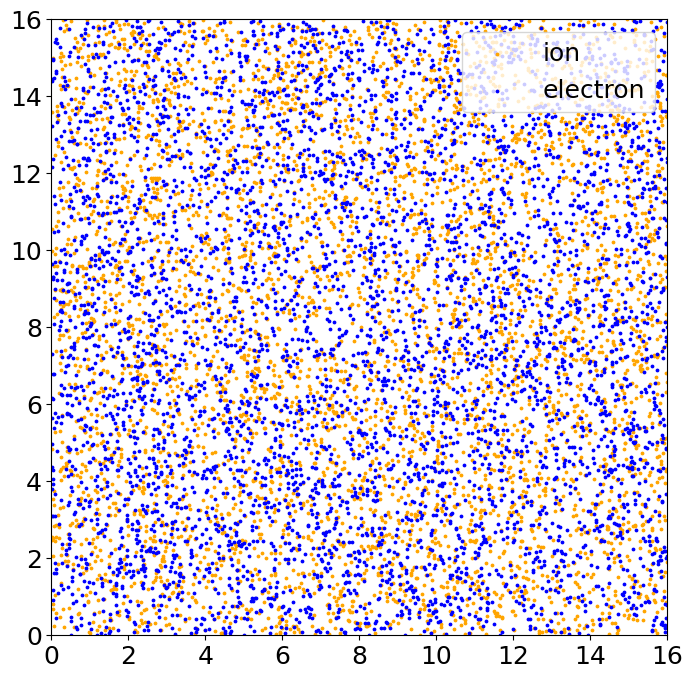

In [14]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

step = 1000
x_ion = np.loadtxt(f"./results/linear_x_ion_{step}.txt", delimiter=',')
v_ion = np.loadtxt(f"./results/linear_v_ion_{step}.txt", delimiter=',')
x_electron = np.loadtxt(f"./results/linear_x_electron_{step}.txt", delimiter=',')
v_electron = np.loadtxt(f"./results/linear_v_electron_{step}.txt", delimiter=',')
ax.scatter(x_ion[:, 0], x_ion[:, 1], s=3, color='orange', label='ion')
ax.scatter(x_electron[:, 0], x_electron[:, 1], s=3, color='blue', label='electron')
ax.set_xlim(0.0, x_max)
ax.set_ylim(0.0, y_max)
ax.tick_params(labelsize=18)
ax.set_aspect('equal')
ax.legend(loc='upper right', fontsize=18)

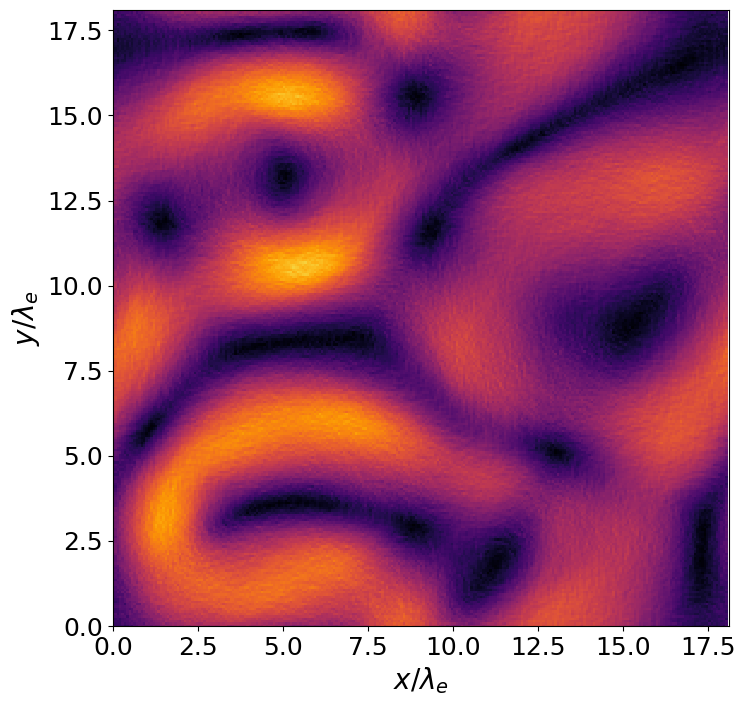

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

X, Y = np.meshgrid(y_coordinate, x_coordinate)

total_steps = 1000
interval = 10
for step in range(0, total_steps+1, interval):
    ax.clear()
    x_ion = np.loadtxt(f"./results/linear_x_ion_{step}.txt", delimiter=',')
    v_ion = np.loadtxt(f"./results/linear_v_ion_{step}.txt", delimiter=',')
    x_electron = np.loadtxt(f"./results/linear_x_electron_{step}.txt", delimiter=',')
    v_electron = np.loadtxt(f"./results/linear_v_electron_{step}.txt", delimiter=',')
    ax.scatter(x_ion[:, 0], x_ion[:, 1], s=3, color='orange', label='ion')
    ax.scatter(x_electron[:, 0], x_electron[:, 1], s=3, color='blue', label='electron')
    ax.set_xlim(0.0, x_max)
    ax.set_ylim(0.0, y_max)
    ax.tick_params(labelsize=18)
    ax.set_aspect('equal')
    ax.legend(loc='upper right', fontsize=18)
    fig.savefig(f'./pictures/{step}.png', dpi=200)


img = cv2.imread(f'./pictures/0.png')
framesize = (img.shape[1], img.shape[0])
fps = 10.0

fourcc = cv2.VideoWriter_fourcc('m','p','4','v')
video  = cv2.VideoWriter(filename=f'linear_xy.mp4', fourcc=fourcc, fps=fps, frameSize=framesize)

for step in range(0, total_steps, interval):
    img = cv2.imread(f'./pictures/{step}.png')
    video.write(img)
video.release()